# day 305,day 306,day 307,day 308,day 309,day 310,day 321

# Time series

## Time series classification:
* it is used for finding anomalies(outliers) in the data by framing questions such as is this a good time to buy this stock or not? is this ECG signal indicates something abnormal or not?

## Time series prediction(forecasting):
* what price will this stock be at after 3 months given the historical data?
* what this person is likely to do at 3pm on 25 th december next year given what he had been doing historically on all 25 th of decembers since his birth?
* what score will this student score on the mid-term exam given his previous academic performance.
* How many phones would king mobiles sell next month given its historical sales records?



## Where predictions fails?

* predicting in a complex environment where many things interact with each other is impossible where it is ambiguous what any system would be doing at any point of TIME.


## factors that determines the predictability of any event:
1. how well we understand the factors that contribute to the prediction?
2. how much data is available?
3. how similar the future is to the past?
4. whether the thing we are trying to forecast is affected by our forcast?


##  Types of Timeseries data you should be familiar with.

1. long term increase or decrease: it could be linear or non-linear.
2. seasonal: orient green energy gets a lot of wind in september quarter than any other.
3. cyclic: things happen in the same way over and over and it is reflected in data.

# our goal:
1. get the data
2. preprocess the data.
3. setup multiple experiments.
4. build a multi-variate model to take on the multiple variate time series data.
5. replicating the N-Beats algorithm.
6. make predictions.

In [1]:
## import the essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import zipfile,os,requests

## 1. get the data

In [2]:
## 1. get the data
bitcoin_df= pd.read_csv('/content/drive/MyDrive/for machine learning/Learnings/deep learning tool kits/Tensorflow/btc.csv',
                           parse_dates=['Date'],
                           dayfirst=True,
                           index_col=['Date'])
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


## explore the data

In [ ]:
bitcoin_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-10,47153.52734,48146.17188,46905.32031,47771.27734,47771.27734,1.639868e+10
2024-02-11,47768.96875,48535.93750,47617.40625,48293.91797,48293.91797,1.931587e+10
2024-02-12,48296.38672,50280.47656,47745.76172,49958.22266,49958.22266,3.451199e+10
2024-02-13,49941.35938,50358.39063,48406.49609,49742.44141,49742.44141,3.559305e+10
2024-02-14,49733.44531,51953.66016,49343.67969,51549.20313,51549.20313,3.907447e+10


In [ ]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3438 entries, 2014-09-17 to 2024-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3438 non-null   float64
 1   High       3438 non-null   float64
 2   Low        3438 non-null   float64
 3   Close      3438 non-null   float64
 4   Adj Close  3438 non-null   float64
 5   Volume     3438 non-null   float64
dtypes: float64(6)
memory usage: 188.0 KB


In [ ]:
len(bitcoin_df) # there are only 366 rows in this data.

3438

In [3]:
# extracting only the closing price from bitcoin_df and renaming the 'Close' column to 'price'.
bitcoin_price = pd.DataFrame(bitcoin_df['Close']).rename(columns={'Close':'price'}).sort_values(by='Date')
bitcoin_price

,price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-02-10,47771.277340
2024-02-11,48293.917970
2024-02-12,49958.222660


## visualize the bitcoin_price DataFrame

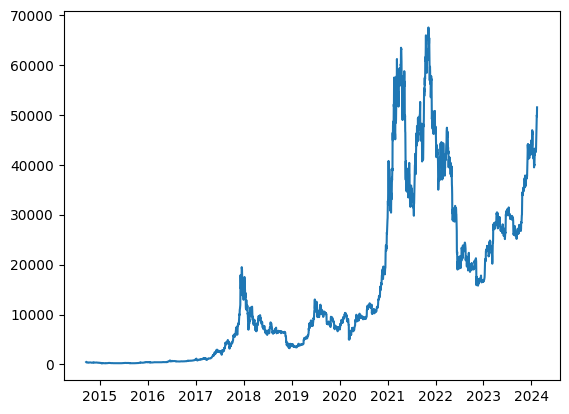

In [ ]:
# visualize the bitcoin_price DataFrame:
prices = bitcoin_price['price']
plt.plot(prices)
plt.show()

## splitting the data for time series

* since the data is time series the splitting approach needs to be different as in time series problems we use the historical data to predict the future we want to split the data into bottom half and top half for x_train,x_test,y_train,y_test let's see this in action.

In [ ]:
n = len(bitcoin_price)

x_train = bitcoin_price.index[:int(n*0.8)] # to 80% of total data
x_test = bitcoin_price.index[int(n*0.8):] # from 80% of total data which is last 20% of data
y_train = bitcoin_price.values[:int(n*0.8)]
y_test = bitcoin_price.values[int(n*0.8):]

### exploration, analysis, and freethrows

In [ ]:
bitcoin_price.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12',
               '2024-02-13', '2024-02-14'],
              dtype='datetime64[ns]', name='Date', length=3438, freq=None)

In [ ]:
bitcoin_price.values[:10]

array([[457.334015],
       [424.440002],
       [394.79599 ],
       [408.903992],
       [398.821014],
       [402.152008],
       [435.790985],
       [423.204987],
       [411.574005],
       [404.424988]])

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(2750, 2750, 688, 688)

# Modelling experiments we are going to run are:

## common nomenclatures:
* **horizon**: number of timesteps we are going to predict into the future.
* **window size**: number of timesteps we are going to use from the data to predict the horizon.

## model experiments:
0. Naive bayes model
1. Dense model with horizon = 1, windows = 7.
2. Dense model with horizon = 1, windows = 30.
3. Dense model with horizon = 7, windows = 30.
4. Conv1D.
5. LSTM
6. Dense model with multivariate data.
7. N-Beats Algorithm (Neural Basis Expansion Analysis for Interpretable Time Series prediction).
8. Ensemble model(multiple models stacked together)
9. Future prediction model
10. Dense model with turkey data(this will show why we can't predict the future in time dependent data )

# model0:  Naive model forecasting.

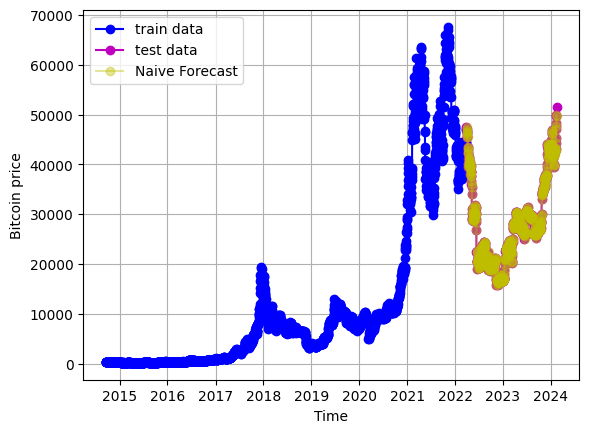

In [ ]:
naive_forecast = y_test[:-1]
plt.plot(x_train,y_train,'bo-',label='train data')
plt.plot(x_test,y_test,'mo-',label='test data')
plt.plot(x_test[1:],naive_forecast,'yo-',label='Naive Forecast',alpha=0.4)

plt.ylabel('Bitcoin price')
plt.xlabel('Time')
plt.grid()
plt.legend()
plt.show()

In [4]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.2/127.2 kB 13.9 MB/s eta 0:00:00


In [ ]:
naive_forecasting = y_test[:-1]
predictions = naive_forecasting
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

mean_absolute_scaled_error(y_test[1:],predictions,y_train=y_train)

1.5055396268356307

In [5]:
# functionize the whole thing:

def evaluation_report(actual:'y_true',prediction:'y_pred',y_train:'y_train'):

  """
  goal: give mae, mse, rmse and mase of our model
  """
  from sklearn.metrics import mean_absolute_error,mean_squared_error
  from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
  import numpy as np


  if prediction.ndim > 2:
    prediction = np.squeeze(prediction)
    actual = np.squeeze(actual)
    y_train = np.squeeze(y_train)

  mae = mean_absolute_error(actual,prediction)
  mse = mean_squared_error(actual,prediction)
  rmse = np.sqrt(mse)
  mase = mean_absolute_scaled_error(actual,prediction,y_train=y_train)

  # creating a dict to hold em all
  report = {'MAE':np.round(mae,3),
            'MSE':np.round(mse,3),
            'RMSE':np.round(rmse,3),
            'MASE':np.round(mase,3)}

  return report

In [ ]:
naive_forecasting = y_test[:-1]
actuals = y_test[1:]
predictions = naive_forecasting

model0_report = evaluation_report(actuals,predictions,y_train)
model0_report

{'MAE': 507.61, 'MSE': 604710.357, 'RMSE': 777.631, 'MASE': 1.506}

In [ ]:
np.mean(y_test)

27937.847438066863

### conclusion:
* naive forecast is just y_test value, so the prediction rate is going to be really really high.
* But mind you when it comes to dealing with real world data the naive forecast model might fumble and stumble to give out some poor, inaccurate, out-of-mark predictions.

## windowing our dataset



eg,
* [1,2,3,4,5,6,7,8] -> [1,2,3,4,5,6,7], [8]

* we are trying to predict the price of bitcoin tomorrow (horizon= 1) given that we have prices of bitcoin for a week(window size = 7)?

In [ ]:
def get_labelled_window(x:'data',horizon:'number of future predictions'=1):
  """
  objective:
  *  we want to get something like a 2D array [[1,2,3,4,5,6,7]] in x
  *  if the horizon is 1 then it would return (  [[1,2,3,4,5,6]], [[7]]  )
  * if the horizon is 2 then it would return  (  [[1,2,3,4,5]], [[6,7]] )

  """
  return x[:, :-horizon], x[:, -horizon: ]


get_labelled_window(np.array([[1,2,3,4,5,6,7]]),horizon=1)

(array([[1, 2, 3, 4, 5, 6]]), array([[7]]))

### exploration, analysis and freethrows

In [ ]:
tf.expand_dims(tf.range(8),axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

### sliding window and expanding window

![sfsfs](https://mathsgee.com/?qa=blob&qa_blobid=5469077755658684180)

### looping through the indices of price data via vectorization.

eg.
* [1,2,3,4,5,6,7] -> 8
* [2,3,4,5,6,7,8] -> 9
* [3,4,5,6,7,8,9] -> 10

In [ ]:
def make_windows_labels(x:'data',window_size:'size of the history',horizon:'size of the future') -> 'returns a tuple of indices' :
  """
  goal: take in an array of data and returns a window and label for the data

  """
  import numpy as np

  # 1. get the window step
  window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

  # 2. get window_indices for each successive window_step(looping would take an insane amount of Time hence vectorization)
  window_indices = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T

  # 3. get the corresponding data of those indices
  windowed_prices = x[window_indices]

  # 4. get labelled window
  window, label = get_labelled_window(windowed_prices,horizon=horizon)

  return window,label

### exploration,analysis and freethrows

In [ ]:
x = np.arange(1,10,1)
window_size = 5
horizon = 1

x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# it converts the 1D array: [1,2,3,4,5] into a 2D array: [[1,2,3,4,5]]
window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
window_step

array([[0, 1, 2, 3, 4, 5]])

In [ ]:
# window_indices via vectorization(looping would take forever for larger datasets)
np.arange(len(x)-(window_size+horizon-1)) # it goes only until the 3rd index because we don't want to run out of indices

array([0, 1, 2, 3])

In [ ]:
np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0)

array([[0, 1, 2, 3]])

In [ ]:
np.expand_dims(np.arange(len(x)-window_size+horizon-1),axis=0).T

array([[0],
       [1],
       [2],
       [3]])

In [ ]:
window_indices = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
window_indices

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7, 8]])

In [ ]:
windowed_prices = x[window_indices]
windowed_prices

array([[1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7, 8],
       [4, 5, 6, 7, 8, 9]])

In [ ]:
# get windows and labels from windowed_prices
window, label = get_labelled_window(windowed_prices,horizon=horizon)

for i in range(len(window)):
  print('{} -> {}'.format(window[i],label[i]))


[1 2 3 4 5] -> [6]
[2 3 4 5 6] -> [7]
[3 4 5 6 7] -> [8]
[4 5 6 7 8] -> [9]


In [ ]:
# explanation:
"""
1. In the first vectorization the left side array:[1,2,3,4,5] is added with 0 yielding:[1,2,3,4,5]
2. In the second vectorization the left side array:[1,2,3,4,5] is added with 1 yielding:[2,3,4,5,6]
and so on.. Hope you got idea!
"""

np.array([[1,2,3,4,5]]) + np.expand_dims(np.arange(len(x)-window_size+horizon-1),axis=0).T



array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

## spliting our data_window and data_labels for training and testing purposes

In [ ]:
def make_train_test_split(windows:'window data',labels:'Label data',test_split=0.2):

  """
  objective: split the windows and labels into training and testing data.


  test_split: is a keyword argument. you can modify it when calling with the value of your choosing.

  returns x_train,x_test,y_train,y_test in the same order.
  """

  split_size = int(len(windows)*(1-test_split))
  x_train = windows[:split_size]
  y_train = labels[:split_size]
  x_test  = windows[split_size:]
  y_test = labels[split_size:]

  return x_train,x_test,y_train,y_test



### exploration, analysis and freethrows

In [ ]:
window = [1,2,3,4,5]
split_size = 0.2

int(len(window) * (1-split_size))

4

In [ ]:
len(x_train),len(y_train),len(x_test),len(y_test)

(2750, 2750, 688, 688)

## model checkpoint callback creation


### The rationale behind creating this modelling checkpoint:
1. we want to compare each model's best performances against the other model's best performance, so we may need some ruler of some sort to see when the model performs best(it must check the model's performance epoch by epoch). This ruler is called model checkpoint creation callback(an in-built feature of tensorflow).
2. since it also saves the performance of the model epoch by epoch we don't have to worry should the power go off or any kind of external factors interrupt the model from completing its full course since we could go back in Time and begin the training process from last saved checkpoint.

In [ ]:
def checkpoint_callback(experiment_name):
  file_path = 'callbacks/checkpoint/' + str(experiment_name)

  cc = tf.keras.callbacks.ModelCheckpoint(file_path,
                                          monitor='val_loss',
                                          save_best_only=True,
                                          verbose=0)

  return cc

# model 1: Dense model with window_size = 7, horizon = 1

In [ ]:
# preparing the data:
horizon = 1
window_size = 7
windows, labels = make_windows_labels(x=bitcoin_price['price'].values,window_size=window_size,horizon=horizon)
x_train,x_test,y_train,y_test = make_train_test_split(windows=windows,labels=labels,test_split=0.2)

# creating the model:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear') # it is a linear forecasting
])

# compiling the model
model1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

# fitting the model with data
tf.random.set_seed(42)
history1 = model1.fit(x=x_train,
                     y=y_train,
                     batch_size=8,
                     epochs=100,
                     validation_data=(x_test,y_test),
                     callbacks=[checkpoint_callback('model1_dense_windows7horizon1')])

Epoch 1/100
343/343 [==============================] - 2s 5ms/step - loss: 770.4824 - mae: 770.4824 - mse: 4578778.5000 - val_loss: 839.2753 - val_mae: 839.2753 - val_mse: 1320396.2500
Epoch 2/100
343/343 [==============================] - 1s 2ms/step - loss: 581.5394 - mae: 581.5394 - mse: 1604739.7500 - val_loss: 1009.0562 - val_mae: 1009.0562 - val_mse: 1603487.2500
Epoch 3/100
343/343 [==============================] - 1s 2ms/step - loss: 510.1265 - mae: 510.1265 - mse: 1183087.6250 - val_loss: 1050.4738 - val_mae: 1050.4738 - val_mse: 1702100.2500
Epoch 4/100
343/343 [==============================] - 1s 2ms/step - loss: 490.2186 - mae: 490.2186 - mse: 1149481.1250 - val_loss: 1252.2537 - val_mae: 1252.2537 - val_mse: 2167167.0000
Epoch 5/100
343/343 [==============================] - 2s 5ms/step - loss: 481.4545 - mae: 481.4545 - mse: 1126370.0000 - val_loss: 608.7581 - val_mae: 608.7581 - val_mse: 752829.4375
Epoch 6/100
343/343 [==============================] - 3s 9ms/step - l

In [ ]:
prediction = model1.predict(x_test)
actual = y_test
model1_report = evaluation_report(actual,prediction,y_train)
model1_report

22/22 [==============================] - 0s 1ms/step


{'MAE': 1059.599, 'MSE': 1594180.357, 'RMSE': 1262.609, 'MASE': 3.135}

In [ ]:
# load the best performance of model1 from checkpoint
model1 = tf.keras.models.load_model('callbacks/checkpoint/model1_dense_windows7horizon1')

### exploration, analysis and freethrows

## creating a function to make predictions with our trained models

In [6]:
def predict(model,x_test,y_test,y_train) -> 'returns model report':

  prediction = model.predict(x_test)
  actual = y_test
  report = evaluation_report(actual,prediction,y_train)
  return report

In [ ]:
model1_report = predict(model1,x_test,y_test,y_train)
model1_report

22/22 [==============================] - 0s 1ms/step


{'MAE': 509.682, 'MSE': 611040.209, 'RMSE': 781.691, 'MASE': 1.508}

#  Model2: dense model, windows = 30, horizon = 1.

In [ ]:
## prepare the data
horizon = 1
window_size = 30
windows,labels = make_windows_labels(bitcoin_price['price'].values,window_size=window_size,horizon=horizon)
x_train,x_test,y_train,y_test = make_train_test_split(windows,labels,test_split=0.2)

## create the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear')

],name='model2_dense_windows30horizon1')

## compile the model
model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

## fit the model
tf.random.set_seed(42)
model2.fit(x=x_train,
           y=y_train,
           batch_size=8,
           epochs=100,
           validation_data=(x_test,y_test),
           callbacks=[checkpoint_callback(model2.name)])

Epoch 1/100
341/341 [==============================] - 2s 4ms/step - loss: 1211.9629 - mae: 1211.9629 - mse: 7563322.5000 - val_loss: 1612.0704 - val_mae: 1612.0704 - val_mse: 4004763.0000
Epoch 2/100
341/341 [==============================] - 1s 3ms/step - loss: 895.2325 - mae: 895.2325 - mse: 3606691.7500 - val_loss: 1822.3365 - val_mae: 1822.3365 - val_mse: 4860838.0000
Epoch 3/100
341/341 [==============================] - 1s 3ms/step - loss: 785.4697 - mae: 785.4697 - mse: 2774266.7500 - val_loss: 1703.2291 - val_mae: 1703.2291 - val_mse: 4021060.0000
Epoch 4/100
341/341 [==============================] - 1s 3ms/step - loss: 763.2255 - mae: 763.2255 - mse: 2582774.7500 - val_loss: 4045.3340 - val_mae: 4045.3340 - val_mse: 18615408.0000
Epoch 5/100
341/341 [==============================] - 1s 3ms/step - loss: 819.2768 - mae: 819.2768 - mse: 3130450.0000 - val_loss: 793.0382 - val_mae: 793.0382 - val_mse: 1233041.0000
Epoch 6/100
341/341 [==============================] - 1s 2ms/st

In [ ]:
## seeing the model prediction:
predict(model2,x_test,y_test,y_train)

22/22 [==============================] - 0s 1ms/step


{'MAE': 672.082, 'MSE': 832209.368, 'RMSE': 912.255, 'MASE': 1.968}

In [ ]:
## load the best version of the model by pulling the best version from the checkpoint callback:
model2 = tf.keras.models.load_model('callbacks/checkpoint/model2_dense_windows30horizon1')

In [ ]:
## predict the best_version now
model2_report = predict(model2,x_test,y_test,y_train)

model2_report

22/22 [==============================] - 0s 1ms/step


{'MAE': 530.151, 'MSE': 640824.509, 'RMSE': 800.515, 'MASE': 1.553}

### exploration, analysis and freethrows

In [ ]:
model0_report

{'MAE': 507.61, 'MSE': 604710.357, 'RMSE': 777.631, 'MASE': 1.506}

In [ ]:
model1_report

{'MAE': 509.682, 'MSE': 611040.209, 'RMSE': 781.691, 'MASE': 1.508}

# model3_dense: window_size=30, horizon=7

In [ ]:
## prepare the data
horizon = 7
window_size = 30
windows,labels = make_windows_labels(bitcoin_price['price'].values,window_size=window_size,horizon=horizon)
x_train,x_test,y_train,y_test = make_train_test_split(windows,labels,test_split=0.2)

## create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear')

],name='model3_dense_windows30horizon7')

## compile the model
model3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

## fit the model
tf.random.set_seed(42)
model3.fit(x=x_train,
           y=y_train,
           batch_size=8,
           epochs=100,
           validation_data=(x_test,y_test),
           callbacks=[checkpoint_callback(model3.name)])

Epoch 1/100
341/341 [==============================] - 2s 4ms/step - loss: 1536.7885 - mae: 1536.7885 - mse: 16204178.0000 - val_loss: 1891.1024 - val_mae: 1891.1024 - val_mse: 6402010.5000
Epoch 2/100
341/341 [==============================] - 1s 3ms/step - loss: 1031.9796 - mae: 1031.9796 - mse: 4951434.0000 - val_loss: 2138.7908 - val_mae: 2138.7908 - val_mse: 8371286.5000
Epoch 3/100
341/341 [==============================] - 1s 3ms/step - loss: 972.5329 - mae: 972.5329 - mse: 4486015.5000 - val_loss: 1958.3735 - val_mae: 1958.3735 - val_mse: 6634787.0000
Epoch 4/100
341/341 [==============================] - 1s 3ms/step - loss: 960.1551 - mae: 960.1551 - mse: 4383933.0000 - val_loss: 2032.1573 - val_mae: 2032.1573 - val_mse: 6959180.5000
Epoch 5/100
341/341 [==============================] - 1s 3ms/step - loss: 970.7469 - mae: 970.7469 - mse: 4308454.0000 - val_loss: 1846.1484 - val_mae: 1846.1484 - val_mse: 5863082.0000
Epoch 6/100
341/341 [==============================] - 1s 3m

In [ ]:
## predict the model3
predict(model3,x_test,y_test,y_train)

22/22 [==============================] - 0s 1ms/step


{'MAE': 1313.108, 'MSE': 3372247.921, 'RMSE': 1836.368, 'MASE': 3.844}

In [ ]:
## load the best checkpoint of the model
model3 = tf.keras.models.load_model('callbacks/checkpoint/model3_dense_windows30horizon7')


In [ ]:
## predict on the model3 now and store its report
model3_report = predict(model3,x_test,y_test,y_train)
model3_report

22/22 [==============================] - 0s 1ms/step


{'MAE': 1074.709, 'MSE': 2756113.501, 'RMSE': 1660.155, 'MASE': 3.146}

# which of our model is performing the best so far?

In [ ]:
model0_report, model1_report,model2_report,model3_report

({'MAE': 507.61, 'MSE': 604710.357, 'RMSE': 777.631, 'MASE': 1.506},
 {'MAE': 509.682, 'MSE': 611040.209, 'RMSE': 781.691, 'MASE': 1.508},
 {'MAE': 530.151, 'MSE': 640824.509, 'RMSE': 800.515, 'MASE': 1.553},
 {'MAE': 1074.709, 'MSE': 2756113.501, 'RMSE': 1660.155, 'MASE': 3.146})

In [ ]:
# DataFrame the model reports
model_reports = pd.DataFrame([model0_report,model1_report,model2_report,model3_report],
             index=['model0','model1','model2','model3'],
             )

model_reports

,MAE,MSE,RMSE,MASE
model0,507.610,604710.357,777.631,1.506
model1,509.682,611040.209,781.691,1.508
model2,530.151,640824.509,800.515,1.553
model3,1074.709,2756113.501,1660.155,3.146


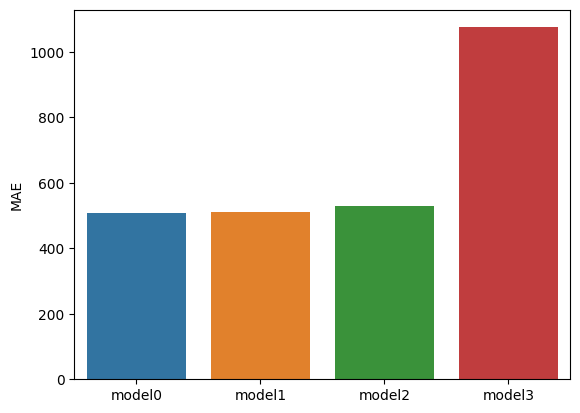

In [ ]:
## visualize the model_reports (only on MAE)
import seaborn as sns
sns.barplot(model_reports,x=model_reports.index,y= model_reports['MAE'],hue=model_reports.index)
plt.xlabel('')
plt.show()

### exploration, analysis and freethrows

In [ ]:
model_reports.index

Index(['model0', 'model1', 'model2', 'model3'], dtype='object')

In [ ]:
model_reports.values

array([[5.07610000e+02, 6.04710357e+05, 7.77631000e+02, 1.50600000e+00],
       [5.09682000e+02, 6.11040209e+05, 7.81691000e+02, 1.50800000e+00],
       [5.30151000e+02, 6.40824509e+05, 8.00515000e+02, 1.55300000e+00],
       [1.07470900e+03, 2.75611350e+06, 1.66015500e+03, 3.14600000e+00]])

In [ ]:
model_reports['MAE']

model0     507.610
model1     509.682
model2     530.151
model3    1074.709
Name: MAE, dtype: float64

In [ ]:
model_reports.columns

Index(['MAE', 'MSE', 'RMSE', 'MASE'], dtype='object')

## conclusion;
* the naive model performs better because of AUTOCORRELATION between the current value and the past value.
* but it may not perform as good when it comes to predicting the distant future whose immediate past values and immediate current values are totally totally totally unknown.

# model4_Conv1D

* the error we got when we first ran it without lamda layer was: "expected min_ndim=3, found ndim=2. Full shape received: (None, 7)".
* it seems that conv1D only takes in inputs with dimension 3.
* to get the input_dim to be 3 instead of 2 we expand the dimension of the x_train inputs.
* we use Lambda layer to get an arbritary function inside the tensorflow sequential layer in our case we use expansion function and we want it be included in the tensorflow layers.


In [ ]:
## prepare the data
horizon = 1
window_size = 7
windows,labels = make_windows_labels(bitcoin_price['price'].values,window_size=window_size,horizon=horizon)
x_train,x_test,y_train,y_test = make_train_test_split(windows,labels,test_split=0.2)

## create the model
model4 = tf.keras.Sequential([

    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1)), # expand the dimension because conv1D works only with 3d
    tf.keras.layers.Conv1D(filters=128,
                           kernel_size=window_size,
                           strides = 1,
                           padding='causal',
                           activation='relu'),
    # tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear')
],name='model4_Conv1D')

## compile the model
model4.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

## fit the model
model4.fit(x=x_train,
           y=y_train,
           epochs=100,
           batch_size=8,
           validation_data=(x_test,y_test),
           callbacks=[checkpoint_callback(model4.name)])

Epoch 1/100
343/343 [==============================] - 4s 9ms/step - loss: 994.5319 - mae: 994.5319 - mse: 10300032.0000 - val_loss: 1593.2877 - val_mae: 1593.2877 - val_mse: 3833178.2500
Epoch 2/100
343/343 [==============================] - 2s 6ms/step - loss: 613.5271 - mae: 613.5271 - mse: 1762190.0000 - val_loss: 1323.5059 - val_mae: 1323.5059 - val_mse: 2728903.0000
Epoch 3/100
343/343 [==============================] - 1s 4ms/step - loss: 531.8975 - mae: 531.8975 - mse: 1346061.7500 - val_loss: 734.5947 - val_mae: 734.5947 - val_mse: 1131104.0000
Epoch 4/100
343/343 [==============================] - 1s 2ms/step - loss: 533.1641 - mae: 533.1641 - mse: 1333520.7500 - val_loss: 1115.8439 - val_mae: 1115.8439 - val_mse: 1884462.7500
Epoch 5/100
343/343 [==============================] - 1s 2ms/step - loss: 495.5416 - mae: 495.5416 - mse: 1188853.8750 - val_loss: 948.2735 - val_mae: 948.2735 - val_mse: 1476338.8750
Epoch 6/100
343/343 [==============================] - 1s 2ms/step -

In [ ]:
# predict on the model
predict(model4,x_test,y_test,y_train)

22/22 [==============================] - 0s 2ms/step


{'MAE': 1040.373, 'MSE': 1550735.947, 'RMSE': 1245.285, 'MASE': 3.078}

In [ ]:
# load from the best checkpoint
model4 = tf.keras.models.load_model('callbacks/checkpoint/model4_Conv1D')

In [ ]:
# predict on the best checkpoint
model4_report = predict(model4,x_test,y_test,y_train)
model4_report

22/22 [==============================] - 0s 2ms/step


{'MAE': 506.13, 'MSE': 607599.095, 'RMSE': 779.486, 'MASE': 1.498}

In [ ]:
# naive model report
model0_report

{'MAE': 507.61, 'MSE': 604710.357, 'RMSE': 777.631, 'MASE': 1.506}

## exploration, analysis and freethrows

In [ ]:
x_train.shape

(2744, 7)

In [ ]:
# Lamda layer allows us to any pythonic function into the tensorflow layer.

expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [ ]:
# passing x to expand_dims_layer
expand_dims_layer(x_train)

<tf.Tensor: shape=(2744, 1, 7), dtype=float32, numpy=
array([[[  457.334,   424.44 ,   394.796, ...,   398.821,   402.152,
           435.791]],

       [[  424.44 ,   394.796,   408.904, ...,   402.152,   435.791,
           423.205]],

       [[  394.796,   408.904,   398.821, ...,   435.791,   423.205,
           411.574]],

       ...,

       [[41247.824, 41077.996, 42358.81 , ..., 43960.934, 44348.73 ,
         44500.83 ]],

       [[41077.996, 42358.81 , 42892.957, ..., 44348.73 , 44500.83 ,
         46820.492]],

       [[42358.81 , 42892.957, 43960.934, ..., 44500.83 , 46820.492,
         47128.004]]], dtype=float32)>

In [ ]:
# checking the shapes of original x and expanded x
x_train.shape, expand_dims_layer(x_train).shape

((2744, 7), TensorShape([2744, 1, 7]))

In [ ]:
"""
so for example if we set the kernel size = 7 we would see 7 of these values at a time
"""

tf.expand_dims(x_train,axis=2).shape

TensorShape([2744, 7, 1])

In [ ]:
tf.squeeze(model4.predict(x_test))

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(687,), dtype=float32, numpy=
array([47488.95 , 47180.03 , 45776.36 , 46231.82 , 45918.824, 46343.812,
       46564.426, 45672.402, 43529.723, 43513.31 , 42451.508, 42680.773,
       42233.26 , 39842.68 , 40077.85 , 41027.61 , 40028.17 , 40431.727,
       40433.96 , 39805.31 , 40680.08 , 41390.902, 41376.887, 40626.242,
       39871.438, 39552.145, 39468.395, 40297.316, 38378.043, 39103.258,
       39708.188, 38723.14 , 37822.25 , 38392.92 , 38513.402, 37811.13 ,
       39429.863, 36959.348, 36135.39 , 35615.79 , 34244.72 , 30774.604,
       30956.498, 29199.1  , 28981.678, 29198.678, 29937.264, 31125.01 ,
       30005.578, 30389.537, 28973.723, 30130.762, 29324.3  , 29375.568,
       30202.738, 29235.684, 29585.896, 29576.162, 29298.287, 28705.857,
       28795.676, 29359.387, 31437.158, 31788.502, 30059.303, 30453.713,
       29850.852, 29812.67 , 29871.582, 31153.662, 31174.219, 30318.08 ,
       30157.076, 29246.525, 28466.209, 26971.498, 23058.652, 22300.643,
   

In [ ]:
np.squeeze(y_test)

array([47062.66406, 45538.67578, 46281.64453, 45868.94922, 46453.56641,
       46622.67578, 45555.99219, 43206.73828, 43503.84766, 42287.66406,
       42782.13672, 42207.67188, 39521.90234, 40127.18359, 41166.73047,
       39935.51563, 40553.46484, 40424.48438, 39716.95313, 40826.21484,
       41502.75   , 41374.37891, 40527.36328, 39740.32031, 39486.73047,
       39469.29297, 40458.30859, 38117.46094, 39241.12109, 39773.82813,
       38609.82422, 37714.875  , 38469.09375, 38529.32813, 37750.45313,
       39698.37109, 36575.14063, 36040.92188, 35501.95313, 34059.26563,
       30296.95313, 31022.90625, 28936.35547, 29047.75195, 29283.10352,
       30101.26563, 31305.11328, 29862.91797, 30425.85742, 28720.27148,
       30314.33398, 29200.74023, 29432.22656, 30323.72266, 29098.91016,
       29655.58594, 29562.36133, 29267.22461, 28627.57422, 28814.90039,
       29445.95703, 31726.39063, 31792.31055, 29799.08008, 30467.48828,
       29704.39063, 29832.91406, 29906.66211, 31370.67188, 31155

In [ ]:
actual = y_test
prediction = model4.predict(x_test)
if prediction.ndim > 2:
  prediction = np.squeeze(prediction)
  actual = np.squeeze(actual)
  y_train = np.squeeze(y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
mae = mean_absolute_error(actual,prediction)
mse = mean_squared_error(actual,prediction)
rmse = np.sqrt(mse)
mase = mean_absolute_scaled_error(actual,prediction,y_train=y_train)

# creating a dict to hold em all
report = {'MAE':np.round(mae,3),
          'MSE':np.round(mse,3),
          'RMSE':np.round(rmse,3),
          'MASE':np.round(mase,3)}

report

22/22 [==============================] - 0s 2ms/step


{'MAE': 506.13, 'MSE': 607599.095, 'RMSE': 779.486, 'MASE': 1.498}

In [ ]:
prediction.shape, np.squeeze(prediction).shape,actual.shape

((687,), (687,), (687,))

# model5_LSTM

In [ ]:
# preparing the data
window_size = 7
horizon = 1
windows,labels = make_windows_labels(bitcoin_price['price'].values,window_size,horizon)
x_train,x_test,y_train,y_test = make_train_test_split(windows,labels,test_split=0.2)

# lets build the LSTM model with Functional API
input_layer = tf.keras.layers.Input(shape=window_size,name='input_layer')
expanded_input = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(input_layer)
lstm = tf.keras.layers.LSTM(128,activation='relu',return_sequences=True)(expanded_input) # the activation need only be relu, tanh won't work
lstm = tf.keras.layers.LSTM(128,activation='relu')(lstm)
output_layer = tf.keras.layers.Dense(horizon,activation='linear',name='output_layer')(lstm)
model5 = tf.keras.Model(inputs=input_layer,outputs=output_layer,name='model5_LSTM')


# compile the model
model5.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

# fit the model
tf.random.set_seed(42)
model5.fit(x=x_train,
           y=y_train,
           epochs=100,
           batch_size=8,
           validation_data=(x_test,y_test),
           callbacks=[checkpoint_callback(model5.name)])

Epoch 1/100
343/343 [==============================] - 8s 17ms/step - loss: 1620.3754 - mae: 1620.3754 - mse: 26268448.0000 - val_loss: 867.2996 - val_mae: 867.2996 - val_mse: 1693718.7500
Epoch 2/100
343/343 [==============================] - 2s 5ms/step - loss: 628.0035 - mae: 628.0035 - mse: 1853541.3750 - val_loss: 1418.1758 - val_mae: 1418.1758 - val_mse: 3070642.7500
Epoch 3/100
343/343 [==============================] - 5s 15ms/step - loss: 557.5157 - mae: 557.5157 - mse: 1437759.1250 - val_loss: 767.5215 - val_mae: 767.5215 - val_mse: 1218552.1250
Epoch 4/100
343/343 [==============================] - 2s 5ms/step - loss: 641.6100 - mae: 641.6100 - mse: 2061575.8750 - val_loss: 950.3616 - val_mae: 950.3616 - val_mse: 1642791.8750
Epoch 5/100
343/343 [==============================] - 6s 17ms/step - loss: 541.0813 - mae: 541.0813 - mse: 1431028.2500 - val_loss: 719.3463 - val_mae: 719.3463 - val_mse: 1054409.1250
Epoch 6/100
343/343 [==============================] - 2s 6ms/step 

In [ ]:
predict(model5,x_test,y_test,y_train)

22/22 [==============================] - 0s 3ms/step


{'MAE': 811.167, 'MSE': 1064196.359, 'RMSE': 1031.599, 'MASE': 2.4}

In [ ]:
## best checkpoint
model5 = tf.keras.models.load_model('callbacks/checkpoint/model5_LSTM')

In [ ]:
## predict on the best checkpoint
model5_report = predict(model5,x_test,y_test,y_train)
model5_report

22/22 [==============================] - 1s 4ms/step


{'MAE': 508.838, 'MSE': 610939.946, 'RMSE': 781.626, 'MASE': 1.506}

### exploration, analysis and freethrows

In [ ]:
model4_report

{'MAE': 506.13, 'MSE': 607599.095, 'RMSE': 779.486, 'MASE': 1.498}

In [ ]:
model0_report

{'MAE': 507.61, 'MSE': 604710.357, 'RMSE': 777.631, 'MASE': 1.506}

In [ ]:
## conclusion: model5 seems to have defeated the model0 by a slight precision.

# Turning the uni-variate Timeseries to Multi-variate

1. Include bitcoin halvings price  to the bitcoin_price df
2. scale the dataframe: use minmax scaling to have values between 0 and 1 for price and block_reward columns.
3. plot it.

In [7]:
# lets add the halving events to our bitcoin_price dataframe
date0 = np.datetime64('2012-11-28')
date1 = np.datetime64('2016-07-09')
date2 = np.datetime64('2020-05-11')

price0 = 25
price1 = 12.5
price2 = 6.25

# fill in the price0 as block_reward in bitcoin_price.index between date0 and date1
"""
By using .loc, you're correctly targeting the rows that meet the boolean condition and
assigning price to the 'block_reward' column of those rows.
"""
boolean = (bitcoin_price.index >= date0)  & (bitcoin_price.index < date1)
bitcoin_price.loc[boolean,'block_reward'] = price0

# fill in the price1 as block_reward in bitcoin_price.index between date1 and date2
boolean = (bitcoin_price.index >= date1) & (bitcoin_price.index < date2)
bitcoin_price.loc[boolean,'block_reward'] = price1

# fill in the price2 as block_reward in bitcoin_price.index > date2
boolean = (bitcoin_price.index >= date2)
bitcoin_price.loc[boolean,'block_reward'] = price2




In [ ]:
bitcoin_price

,price,block_reward
Date,,
2014-09-17,457.334015,25.00
2014-09-18,424.440002,25.00
2014-09-19,394.795990,25.00
2014-09-20,408.903992,25.00
2014-09-21,398.821014,25.00
...,...,...
2024-02-10,47771.277340,6.25
2024-02-11,48293.917970,6.25
2024-02-12,49958.222660,6.25


### exploration, analysis and freethrows

In [ ]:
bitcoin_price.head()

,price,block_reward
Date,,
2014-09-17,457.334015,25.0
2014-09-18,424.440002,25.0
2014-09-19,394.795990,25.0
2014-09-20,408.903992,25.0
2014-09-21,398.821014,25.0


In [ ]:
bitcoin_price.tail()

,price,block_reward
Date,,
2024-02-10,47771.27734,6.25
2024-02-11,48293.91797,6.25
2024-02-12,49958.22266,6.25
2024-02-13,49742.44141,6.25
2024-02-14,51549.20313,6.25


In [ ]:
np.datetime64('2064-02-12')

numpy.datetime64('2064-02-12')

In [ ]:
date0

numpy.datetime64('2012-11-28')

In [ ]:
date0 < date1

True

In [ ]:
## take the dates between the mentioned date
bitcoin_price.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08',
               '2024-02-09', '2024-02-10', '2024-02-11', '2024-02-12',
               '2024-02-13', '2024-02-14'],
              dtype='datetime64[ns]', name='Date', length=3438, freq=None)

In [ ]:
boolean = (bitcoin_price.index < date1) & (bitcoin_price.index > date0 )
bitcoin_price[boolean]

,price,block_reward
Date,,
2014-09-17,457.334015,25.0
2014-09-18,424.440002,25.0
2014-09-19,394.795990,25.0
2014-09-20,408.903992,25.0
2014-09-21,398.821014,25.0
...,...,...
2016-07-04,683.661987,25.0
2016-07-05,670.627014,25.0
2016-07-06,677.330994,25.0


In [ ]:
# seeing the indices from 1500 to 1800
bitcoin_price.iloc[1500:1800].head()

,price,block_reward
Date,,
2018-10-26,6474.750000,12.5
2018-10-27,6480.379883,12.5
2018-10-28,6486.390137,12.5
2018-10-29,6332.629883,12.5
2018-10-30,6334.270020,12.5


In [ ]:
# seeing the indices of 10 to 20
bitcoin_price.iloc[10:20]

,price,block_reward
Date,,
2014-09-27,399.519989,25.0
2014-09-28,377.181000,25.0
2014-09-29,375.467010,25.0
2014-09-30,386.944000,25.0
2014-10-01,383.614990,25.0
2014-10-02,375.071991,25.0
2014-10-03,359.511993,25.0
2014-10-04,328.865997,25.0
2014-10-05,320.510010,25.0


In [ ]:
# seeing last few indicies
bitcoin_price.iloc[-5:]

,price,block_reward
Date,,
2024-02-10,47771.27734,6.25
2024-02-11,48293.91797,6.25
2024-02-12,49958.22266,6.25
2024-02-13,49742.44141,6.25
2024-02-14,51549.20313,6.25


## scaling the dataframe

In [ ]:
## scaling the dataframe
from sklearn.preprocessing import minmax_scale

scaled_bitcoin_df = pd.DataFrame(minmax_scale(bitcoin_price[['price','block_reward']]),
                                    index=bitcoin_price.index,
                                    columns=['price','block_reward'])

scaled_bitcoin_df

,price,block_reward
Date,,
2014-09-17,0.004144,1.0
2014-09-18,0.003655,1.0
2014-09-19,0.003216,1.0
2014-09-20,0.003425,1.0
2014-09-21,0.003275,1.0
...,...,...
2024-02-10,0.706248,0.0
2024-02-11,0.714004,0.0
2024-02-12,0.738701,0.0


### exploration, analysis and freethrows

In [ ]:
bitcoin_price[['price','block_reward']].values

array([[4.57334015e+02, 2.50000000e+01],
       [4.24440002e+02, 2.50000000e+01],
       [3.94795990e+02, 2.50000000e+01],
       ...,
       [4.99582227e+04, 6.25000000e+00],
       [4.97424414e+04, 6.25000000e+00],
       [5.15492031e+04, 6.25000000e+00]])

## plotting the scaled_bitcoin_df

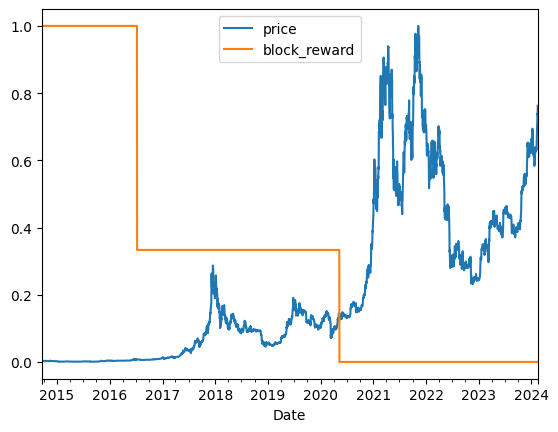

In [ ]:
scaled_bitcoin_df.plot();

# make windows and labels for multivariate time series data

* previously we've used make_windows_labels function to make windows and labels for univariate time series data
* now, we are going to create another function to make windows and labels but this time for multi-variate time series data.
* we are going to directly take the pandas dataframe and shift the values by the window_size

## desired outcome:
* [1,2,3,4,5,6,block_reward] -> 7
* [2,3,4,5,6,7,block_reward] -> 8
* [3,4,5,6,7,8,block_reward] -> 9

In [ ]:
scaled_bitcoin_df.head()

,price,block_reward
Date,,
2014-09-17,0.004144,1.0
2014-09-18,0.003655,1.0
2014-09-19,0.003216,1.0
2014-09-20,0.003425,1.0
2014-09-21,0.003275,1.0


In [8]:
def make_windows_labels_pandas(df:'DataFrame',window_size=7,horizon=1):

  """
  it is going to take in a DataFrame and transform it into carrying windows and labels

  returns the transformed, windows(price+1, price+2, price+3 .....) and labels(price) carrrying DataFrame
  """
  df = df.copy()

  for i in range(window_size):
    df['price+{}'.format(i+1)] = df['price'].shift(periods=i+1)


  return df


bitcoin_price_multi = make_windows_labels_pandas(bitcoin_price)
bitcoin_price_multi.head(10)


,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2014-09-17,457.334015,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25.0,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25.0,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25.0,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25.0,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25.0,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25.0,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [9]:
## form the windows and labels
windows = bitcoin_price_multi.dropna().drop('price',axis=1).values.astype(np.float32)
labels = bitcoin_price_multi.dropna()['price'].values.astype(np.float32) # we sacrifice some prices.


In [ ]:
windows

array([[2.5000000e+01, 4.3579099e+02, 4.0215201e+02, ..., 3.9479599e+02,
        4.2444000e+02, 4.5733401e+02],
       [2.5000000e+01, 4.2320499e+02, 4.3579099e+02, ..., 4.0890399e+02,
        3.9479599e+02, 4.2444000e+02],
       [2.5000000e+01, 4.1157401e+02, 4.2320499e+02, ..., 3.9882101e+02,
        4.0890399e+02, 3.9479599e+02],
       ...,
       [6.2500000e+00, 4.8293918e+04, 4.7771277e+04, ..., 4.4318223e+04,
        4.3084672e+04, 4.2658668e+04],
       [6.2500000e+00, 4.9958223e+04, 4.8293918e+04, ..., 4.5301566e+04,
        4.4318223e+04, 4.3084672e+04],
       [6.2500000e+00, 4.9742441e+04, 4.9958223e+04, ..., 4.7147199e+04,
        4.5301566e+04, 4.4318223e+04]], dtype=float32)

In [ ]:
labels

array([  423.205,   411.574,   404.425, ..., 49958.223, 49742.44 ,
       51549.203], dtype=float32)

In [ ]:
windows.shape,labels.shape

((3431, 8), (3431,))

In [ ]:
## train test split
split_size = int(len(windows)*0.8)
x_train,x_test,y_train,y_test = windows[:split_size],windows[split_size:],labels[:split_size],labels[split_size:]

len(x_train),len(x_test),len(y_train),len(y_test)

(2744, 687, 2744, 687)

### exploration, analysis and freethrows

In [ ]:
len(windows),len(labels)

(3431, 3431)

In [ ]:
bitcoin_price.copy()

,price,block_reward
Date,,
2014-09-17,457.334015,25.00
2014-09-18,424.440002,25.00
2014-09-19,394.795990,25.00
2014-09-20,408.903992,25.00
2014-09-21,398.821014,25.00
...,...,...
2024-02-10,47771.277340,6.25
2024-02-11,48293.917970,6.25
2024-02-12,49958.222660,6.25


# model6_windows=7, horizon=1, multivariate data

In [ ]:
# create the model: recreating the model1
horizon = 1
window_size = 7
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear')
],name='model6_Dense')

# compile the model
model6.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

# fit the model
model6.fit(x=x_train,
           y=y_train,
           epochs=100,
           batch_size=8,
           validation_data=(x_test,y_test),
           callbacks=[checkpoint_callback(model6.name)])


Epoch 1/100
343/343 [==============================] - 4s 7ms/step - loss: 758.7078 - mae: 758.7078 - mse: 3864426.2500 - val_loss: 626.2963 - val_mae: 626.2963 - val_mse: 878402.3125
Epoch 2/100
343/343 [==============================] - 1s 4ms/step - loss: 623.7250 - mae: 623.7250 - mse: 1866475.6250 - val_loss: 1340.8519 - val_mae: 1340.8519 - val_mse: 2468293.0000
Epoch 3/100
343/343 [==============================] - 1s 4ms/step - loss: 506.8079 - mae: 506.8079 - mse: 1182870.6250 - val_loss: 1028.0088 - val_mae: 1028.0088 - val_mse: 1621501.6250
Epoch 4/100
343/343 [==============================] - 1s 2ms/step - loss: 487.3878 - mae: 487.3878 - mse: 1101190.1250 - val_loss: 1586.4874 - val_mae: 1586.4874 - val_mse: 3216970.5000
Epoch 5/100
343/343 [==============================] - 1s 2ms/step - loss: 497.7465 - mae: 497.7465 - mse: 1208197.1250 - val_loss: 1406.2831 - val_mae: 1406.2831 - val_mse: 2613372.0000
Epoch 6/100
343/343 [==============================] - 1s 2ms/step -

In [ ]:
predict(model6,x_test,y_test,y_train)

22/22 [==============================] - 0s 2ms/step


{'MAE': 1116.841, 'MSE': 1737359.1, 'RMSE': 1318.089, 'MASE': 3.305}

In [ ]:
# load the best checkpoint
model6 = tf.keras.models.load_model('callbacks/checkpoint/model6_Dense')

In [ ]:
model6_report = predict(model6,x_test,y_test,y_train)

model6_report

22/22 [==============================] - 0s 2ms/step


{'MAE': 509.606, 'MSE': 611929.75, 'RMSE': 782.259, 'MASE': 1.508}

## exploration, analysis and freethrows.

In [ ]:
model5_report

{'MAE': 508.838, 'MSE': 610939.946, 'RMSE': 781.626, 'MASE': 1.506}

In [ ]:
model1_report

{'MAE': 509.682, 'MSE': 611040.209, 'RMSE': 781.691, 'MASE': 1.508}

In [ ]:
model0_report

{'MAE': 507.61, 'MSE': 604710.357, 'RMSE': 777.631, 'MASE': 1.506}

# Model7: N-BEATS

* (Neural Basis Expansion Analysis for interpretable Time Series forecasting)

## George Hotz inspiration for machine learning engineers:
1. Download a paper.
2. Implement it.
3. keep doing it until you got skills.

![fsfsf](https://miro.medium.com/v2/resize:fit:836/1*1If8JU4JwFAta1kjMjkTQg.png)

## residual connection to learn better even with vanishing gradients:
What are residual connections?

Imagine a traditional neural network with stacked layers. Information flows from input to the first layer, then the second, and so on. As layers increase, gradients (errors used for learning) can vanish or "explode," making it difficult for the network to learn complex features.
Residual connections introduce "shortcuts" that bypass some layers. Think of it like adding ramps in a building instead of relying solely on stairs. Information can flow directly from an earlier layer to a later one, preserving its strength.
How do they help?

Prevent vanishing gradients: The shortcut guarantees that even if the main path's gradient vanishes, the information from the earlier layer still reaches later layers, aiding learning.
Improve training: Deeper networks with residual connections can learn more complex features, leading to better performance on tasks like image recognition and natural language processing.
Flexibility: Residual connections offer diverse information flow paths, allowing the network to learn both identity mapping (preserving existing information) and new features.
How do they work?

A residual block combines a standard layer stack with a skip connection. This skip connection simply adds the input to the output of the layer stack.
Mathematically, it's like: output = F(x) + x, where x is the input, F(x) is the transformed output by the layers, and output is the final result.


## what are gradients?
* gradients are like memories. it keeps track of what the network has learned so far from the layer_1 till the layer_n.
* vanishing gradient means, the learning cannot happen any further (this happens if we set the learning rate to be too small).

## steps to build N-BEATS model:
1. create a N-BEATS block class layer to create blocks.
2. create the input layer for the stack via functional API method.
3. make the initial forecast and backcast with the N-Beats block layer created in (1).
4. use for loop to create a stack of block layers.
5. use the N-Beats.
5. create the double residual stacking using subtract and add layer.
6. put the model inputs and outputs using tf.keras.Model()
7. compile the model with MAE Loss and Adam optimizer.
8. use 5000 epochs.
9. use EarlyStopping callback to stop the model from training if it doesn't improve the val_loss.
10. reduce learning rate on plateau_if the learning rate doesn't improve the model's performance then try reducing it bit by bit until any noticable improvement could be observed.


In [ ]:
# subclassing a layer:

# create NBeat block custom layer:
class NBeatsBlocks(tf.keras.layers.Layer):
  def __init__(self,window_size,theta_size,horizon,n_neurons,n_layers,**kwargs):

    ## usage of super() is standard when implementing python classes.
    super().__init__(**kwargs)
    self.window_size = window_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    ## A block has 4 fully connected layers and each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]

    ## A block has a theta layer
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation='relu',name='theta_layer')


  # call function does the operation
  def call(self,inputs):
    x = inputs # take the inputs in x

    for layer in self.hidden: # run through all the layers in self.hidden(there are 4 layers)
      x = layer(x) # put the inputs in each layer to get modified x

    theta = self.theta_layer(x) # put the modified x into theta layer to get modified modified x

    # get the backcast and forecast
    backcast, forecast = theta[:,:self.window_size], theta[:,self.window_size:]

    return backcast, forecast # backcasts and forecasts are nothing but windows and labels



In [ ]:
# creating a dummy n-beats block
window_size = 7
horizon = 1
dummy_nbeats_block = NBeatsBlocks(window_size=window_size,
                                  theta_size=window_size+horizon, #backcast + forecast
                                  horizon=horizon,
                                  n_neurons=128,
                                  n_layers=4)

In [ ]:
# creating a dummy input
dummy_input = tf.expand_dims(tf.range(window_size)+1,axis=0) # we expand the dimension to account for batchification
dummy_input

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# passing in the dummpy input inside the dummy_nbeats_block

backcast,forecast = dummy_nbeats_block(dummy_input)
backcast.numpy(),forecast.numpy()

(array([[0.18107992, 1.0156047 , 0.        , 0.        , 0.4189901 ,
         0.5194874 , 0.        ]], dtype=float32),
 array([[0.]], dtype=float32))

In [10]:
# creating a better performant data pipeline for the n-beats model
bitcoin_price_multi = make_windows_labels_pandas(bitcoin_price,window_size=7)

# creating windows and labels
windows = bitcoin_price_multi.dropna().drop('price',axis=1).astype(np.float32)
labels = bitcoin_price_multi.dropna()['price'].astype(np.float32)

# creating x_train,y_train blah blah.
split_size = int(len(windows)*0.8)
x_train,x_test,y_train,y_test = windows[:split_size],windows[split_size:],labels[:split_size],labels[split_size:]


# creating train dataset and test dataset for faster processing:
x_train = tf.data.Dataset.from_tensor_slices(x_train)
y_train = tf.data.Dataset.from_tensor_slices(y_train)
x_test = tf.data.Dataset.from_tensor_slices(x_test)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((x_train,y_train))
test_dataset = tf.data.Dataset.zip((x_test,y_test))

# prefetching, batchifying
batch_size = 32 # according to the N-beats paper we are replicating
train_dataset = train_dataset.batch(1096).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(1096).prefetch(buffer_size=tf.data.AUTOTUNE)


train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [ ]:
# setting up HyperParameters for our N-BEATS model
epochs = 100
n_neurons = 512
n_layers = 4
n_stacks = 30
theta_size = window_size + horizon


In [ ]:
# get the residual connections

## before we build the N-BEATS model we need two layers for the residual connection (subtract and add)

tensor1 = tf.range(10) + 10
tensor2 = tf.range(10)

# subtracting
subtracted = tf.keras.layers.subtract([tensor1,tensor2])

# adding
added = tf.keras.layers.add([tensor1,tensor2])

tensor1, tensor2,subtracted, added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

In [11]:
## creating Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=20,#waits for 200 epochs if any improvement is possible
                                                  restore_best_weights = True)

## creating ReduceLROnPlateau callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 patience=10, # waits for 100 epochs, then it reduces learning_rate
                                                 verbose=1 #just to let us know when that happens

)

## creating a check point callback
def checkpoint(experiment_name):
  file_path = 'callbacks/checkpoint/' + str(experiment_name)

  cc = tf.keras.callbacks.ModelCheckpoint(file_path,
                                          monitor='val_loss',
                                          save_best_only=True,
                                          verbose=0)

  return cc

## N-BEATS Blueprint

## steps to build N-BEATS model:
1. create a N-BEATS block class layer to create blocks.
2. create the input layer for the stack via functional API method.
3. make the initial forecast and backcast with the N-Beats block layer created in (1) and insert the input_layer in it.
4. use for loop to create a stack of block layers.
5. use the N-Beats to calculate backcast and forecast for each stack
5. create the double residual stacking using subtract and add layer.
6. put the model inputs and outputs using tf.keras.Model()
7. compile the model with MAE Loss and Adam optimizer.
8. use 5000 epochs.
9. use EarlyStopping callback to stop the model from training if it doesn't improve the val_loss.
10. reduce learning rate on plateau_if the learning rate doesn't improve the model's performance then try reducing it bit by bit until any noticable improvement could be observed.


In [ ]:
%%time

# step 1: create the nbeats_block_layer
window_size = 8
horizon = 1
nbeats_block_layer = NBeatsBlocks(window_size=window_size,
                                  theta_size=window_size+horizon,
                                  horizon=horizon,
                                  n_neurons=128,
                                  n_layers=4,
                                  name='initial_block')


# step2: create the input layer for stack via functional API
input_layer = tf.keras.layers.Input(shape=window_size,name='stack_layer')

# step3: create the initial forecast and backcast using the NBeatsBlocks layer
initial_backcast, initial_forecast = nbeats_block_layer(input_layer)  ## residual is just backcast in the first block

# step4: use for loop to create a stack of block layer.
n_stacks = 29
for i,_ in enumerate(range(n_stacks)):

  # step5: use NBeatsBlocks to get backcast and forecast for each stack and pass in residuals of the initial layer
  stack_backcast,stack_forecast = NBeatsBlocks(window_size=window_size,
                                   theta_size=window_size+horizon,
                                   horizon=horizon,
                                   n_neurons=128,
                                   n_layers=4,
                                   name='NBeatsBlock_{}'.format(i))(initial_backcast)


  # step6: create double residual stacking(residuals are backcasts) using subtract and add layers.
  initial_backcast = tf.keras.layers.add([initial_backcast,stack_backcast],name='add_{}'.format(i))
  initial_forecast = tf.keras.layers.add([initial_forecast,stack_forecast],name='subtract_{}'.format(i))


# step7: create the model
model7 = tf.keras.Model(inputs=input_layer,outputs=initial_forecast,name='Model7_NBEATS')


# compile the model
model7.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

# fit the model
model7.fit(train_dataset,
           epochs=100,
           validation_data=test_dataset,
           callbacks=[early_stopping,reduce_lr,checkpoint_callback(model7.name)])

NameError: name 'NBeatsBlocks' is not defined

In [ ]:
x_test = windows.values[split_size:]
y_test = labels.values[split_size:]
y_train = labels.values[:split_size]
predict(model7,x_test,y_test,y_train)

22/22 [==============================] - 1s 7ms/step


{'MAE': 531.933, 'MSE': 645418.1, 'RMSE': 803.379, 'MASE': 1.574}

In [ ]:
model7 = tf.keras.models.load_model('callbacks/checkpoint/Model7_NBEATS')

In [ ]:
model7_report = predict(model7,x_test,y_test,y_train)
model7_report

22/22 [==============================] - 1s 8ms/step


{'MAE': 531.933, 'MSE': 645418.1, 'RMSE': 803.379, 'MASE': 1.574}

## exploration, analysis and freethrows

In [ ]:
windows.values.shape

(3431, 8)

# model 8: Ensemble model (combining different models together)

* one person knows only so much lets say the probability of that person being correct is 40% but when many people come together to make a decision, they all put their intelligence, years of, and wisdom together to make that decision, thererfore the probability of being correct may go well upto 100%.
* Ensemble modelling is another term for combined intelligence.

In [ ]:
def get_ensemble_models(horizon=1,
                    train_dataset=train_dataset,
                    test_dataset=test_dataset,
                    num_iter=10,
                    num_epochs=1000,
                    loss_fns=['mae','mse','mape']):

  """
  returns a list of num_iter models each trained on mae,mse,mape
  for example if num_iter = 10, a list of 30 trained models will be returned each trained on mae 10 times,
  mse 10 times, mape 10 times.
  """
  ensemble_models = []

  for i in range(num_iter):
    for loss_fn in loss_fns:

      print("Model {} | loss_fn {}".format(i,loss_fn))

      # creating the model
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
          tf.keras.layers.Dense(horizon,activation='linear')
      ],name='model{}_{}'.format(i,loss_fn))

      # compiling the model
      model.compile(loss=loss_fn,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['mae','mse'])

      # fit the model
      model.fit(train_dataset,
                epochs=num_epochs,
                validation_data=test_dataset,
                verbose=0,
                callbacks=[early_stopping,reduce_lr,checkpoint(model.name)])


      # appending the model to the ensemble_models list
      ensemble_models.append(model)

  return ensemble_models


In [ ]:
%%time

ensemble_models = get_ensemble_models(train_dataset=train_dataset,
                                      test_dataset=test_dataset,
                                      num_iter=5,
                                      num_epochs=100
                                      )

Model 0 | loss_fn mae

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Model 0 | loss_fn mse

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 21: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Model 0 | loss_fn mape

Epoch 69: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Model 1 | loss_fn mae

Epoch 64: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Model 1 | loss_fn mse
Model 1 | loss_fn mape

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Model 2 | loss_fn mae

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 66: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Model 2 | loss_fn mse
Model 2 | loss_fn mape

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Model 3 |

In [ ]:
# make predictions on ensemble models
def ensemble_predictions_fn(ensemble_models,data):
  predictions = []

  for model in ensemble_models:
    pred = model.predict(data)
    predictions.append(pred)

  return tf.constant(tf.squeeze(predictions))

In [ ]:
ensemble_predictions = ensemble_predictions_fn(ensemble_models,test_dataset)
ensemble_predictions

1/1 [==============================] - 0s 7ms/step


<tf.Tensor: shape=(15, 687), dtype=float32, numpy=
array([[46995.25 , 48186.22 , 46975.035, ..., 47696.258, 49419.844,
        50082.973],
       [48971.266, 48760.8  , 47652.605, ..., 50954.15 , 52564.81 ,
        53131.32 ],
       [47635.164, 47427.598, 45710.387, ..., 48425.82 , 50154.566,
        50087.457],
       ...,
       [46780.625, 47131.688, 45769.844, ..., 47625.848, 48822.96 ,
        49431.02 ],
       [47298.47 , 47513.96 , 45345.277, ..., 48174.348, 49605.098,
        49516.65 ],
       [48071.32 , 47175.44 , 46241.605, ..., 48668.85 , 49340.43 ,
        49867.562]], dtype=float32)>

In [ ]:
ensemble_predictions

<tf.Tensor: shape=(15, 687), dtype=float32, numpy=
array([[46995.25 , 48186.22 , 46975.035, ..., 47696.258, 49419.844,
        50082.973],
       [48971.266, 48760.8  , 47652.605, ..., 50954.15 , 52564.81 ,
        53131.32 ],
       [47635.164, 47427.598, 45710.387, ..., 48425.82 , 50154.566,
        50087.457],
       ...,
       [46780.625, 47131.688, 45769.844, ..., 47625.848, 48822.96 ,
        49431.02 ],
       [47298.47 , 47513.96 , 45345.277, ..., 48174.348, 49605.098,
        49516.65 ],
       [48071.32 , 47175.44 , 46241.605, ..., 48668.85 , 49340.43 ,
        49867.562]], dtype=float32)>

In [ ]:
# goals
"""
1. take the mean of the ensemble predictions
2. pass it inside the evaluation_report function
3. form the prediction report
"""

prediction = np.mean(ensemble_predictions,axis=0)
split_size = int(len(labels) * 0.8)
actual = labels[split_size:].values
y_train = labels[:split_size].values

evaluation_report(actual=actual,prediction=prediction,y_train=y_train)

{'MAE': 539.938, 'MSE': 661833.44, 'RMSE': 813.531, 'MASE': 1.598}

In [ ]:
y_train.values

array([  423.205,   411.574,   404.425, ..., 46820.492, 47128.004,
       47465.73 ], dtype=float32)

# 95% of confidence prediction interval via bootstrapping method

## bootstrapping:
* Bootstrapping means taking samples from the data with replacement and doing experiments with them repeatedly for set number of times and distilling their average value as the ultimate empirical value.

## bootstrapping steps:
1. take the population. in our case the population is ensemble_predictions.
2. create a boot_mean array filled with zeros to the length of population.
3. randomly choose some of the prediction samples and find the mean and put it in boot_mean array.
4. find the confidence interval with 95% of confidence of the values in boot_mean array.
5. refer professor mike x cohen's notebook for help.


In [ ]:
# this is confidence interval for the whole:
predictions = np.mean(ensemble_predictions.numpy(),axis=0)

n_boots = 1000
boot_mean = np.zeros(n_boots)

sample_size = 50
for i in range(len(boot_mean)):
  boot_mean[i] = np.mean(np.random.choice(predictions,sample_size))

# finding the confidence interval
confidence = 95
conf_int = np.zeros(2)
conf_int[0] = np.percentile(boot_mean,2.5) # 2.5% from the left
conf_int[1] = np.percentile(boot_mean,97.5) # 97.5% from the right

conf_int

array([25756.0296875 , 30164.80805664])

In [ ]:
# getting 95% confidence interval(lower and upper bounds) for each data point
def confidence_interval(predictions):
  predictions = predictions.numpy()
  mean = np.mean(predictions,axis=0)
  std = np.std(predictions,axis=0)
  z_score = 1.96 # for 95% confidence interval

  lower_bound = mean - z_score*std
  upper_bound = mean + z_score*std

  return lower_bound,upper_bound

In [ ]:
lower_bound,upper_bound = confidence_interval(ensemble_predictions)
lower_bound[:10],upper_bound[:10]

(array([46305.69 , 46619.05 , 44944.29 , 45040.023, 45191.215, 45267.46 ,
        45510.547, 45178.3  , 42535.777, 41816.574], dtype=float32),
 array([48838.332, 48464.105, 47773.414, 47354.438, 46591.152, 46813.5  ,
        47292.21 , 46550.184, 45379.34 , 44975.31 ], dtype=float32))

In [ ]:
predictions[:10],actual[:10]

(array([47572.01 , 47541.58 , 46358.85 , 46197.23 , 45891.184, 46040.48 ,
        46401.38 , 45864.242, 43957.56 , 43395.94 ], dtype=float32),
 array([47062.664, 45538.676, 46281.645, 45868.95 , 46453.566, 46622.676,
        45555.992, 43206.74 , 43503.848, 42287.664], dtype=float32))

# plot the predicitions, actuals, and lower and upper bounds

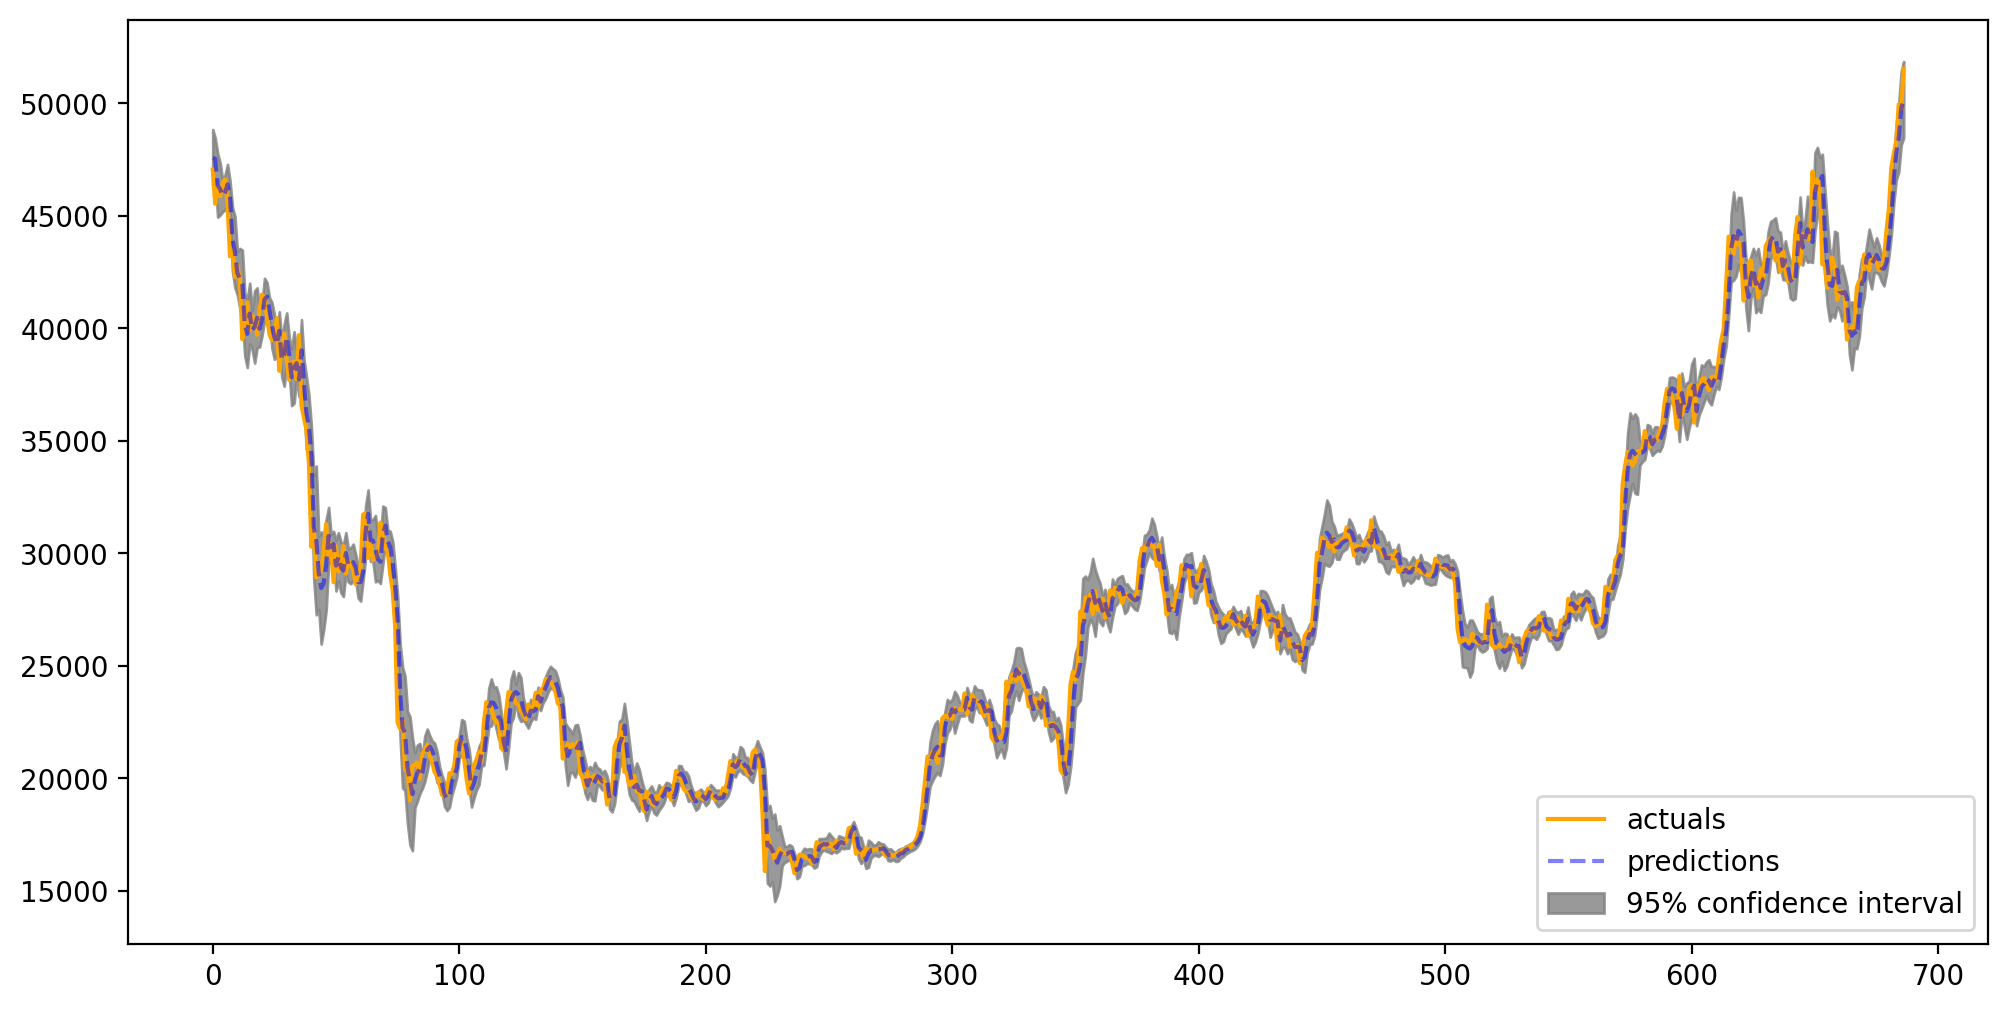

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

x = np.arange(0,len(actual),1)
plt.plot(actual,color='orange',label='actuals')
plt.plot(predictions,'b--',alpha=0.5,label='predictions')
plt.fill_between(x=x,y1=lower_bound,y2=upper_bound,label='95% confidence interval',color='gray',alpha=0.8)

# zooming in a bit
# plt.xlim(400,500)

plt.legend()
plt.show()

# Types of uncertainties:

1. **Aleatoric uncertainty:** this type of uncertainty cannot be reduced. This is also known as subway uncertainty. Aleatoric uncertainty is data dependent.
2. **Epistemic uncertainty:** this type of uncertainty can be reduced. This is also known as coconut uncertainty. Epistemic uncertainty is model dependent or math dependent.

# model9: future prediction model

## goals:
1. train the model on the entire dataset(no test data) to predict the future.


In [ ]:
bitcoin_price_multi

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2014-09-17,457.334015,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25.00,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25.00,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25.00,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25.00,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-02-10,47771.277340,6.25,47147.199220,45301.566410,44318.222660,43084.671880,42658.66797,42583.58203,42992.25000
2024-02-11,48293.917970,6.25,47771.277340,47147.199220,45301.566410,44318.222660,43084.67188,42658.66797,42583.58203
2024-02-12,49958.222660,6.25,48293.917970,47771.277340,47147.199220,45301.566410,44318.22266,43084.67188,42658.66797


In [12]:
# preparing the data
x_all = bitcoin_price_multi.dropna().drop(['block_reward','price'],axis=1).to_numpy().astype(np.float32)
y_all = bitcoin_price_multi.dropna()['price'].to_numpy().astype(np.float32)

x_all[:10],y_all[:10]

(array([[435.791, 402.152, 398.821, 408.904, 394.796, 424.44 , 457.334],
        [423.205, 435.791, 402.152, 398.821, 408.904, 394.796, 424.44 ],
        [411.574, 423.205, 435.791, 402.152, 398.821, 408.904, 394.796],
        [404.425, 411.574, 423.205, 435.791, 402.152, 398.821, 408.904],
        [399.52 , 404.425, 411.574, 423.205, 435.791, 402.152, 398.821],
        [377.181, 399.52 , 404.425, 411.574, 423.205, 435.791, 402.152],
        [375.467, 377.181, 399.52 , 404.425, 411.574, 423.205, 435.791],
        [386.944, 375.467, 377.181, 399.52 , 404.425, 411.574, 423.205],
        [383.615, 386.944, 375.467, 377.181, 399.52 , 404.425, 411.574],
        [375.072, 383.615, 386.944, 375.467, 377.181, 399.52 , 404.425]],
       dtype=float32),
 array([423.205, 411.574, 404.425, 399.52 , 377.181, 375.467, 386.944,
        383.615, 375.072, 359.512], dtype=float32))

In [ ]:
len(x_all),len(y_all)

(3431, 3431)

In [ ]:
np.shape(x_all)[1]

7

In [ ]:
window_size = len(x_all[0])
horizon = 1

window_size, horizon

(7, 1)

In [13]:
# turning our x_all and y_all into better performants

# tensor slice
x_all = tf.data.Dataset.from_tensor_slices(x_all)
y_all = tf.data.Dataset.from_tensor_slices(y_all)

# zip them up
dataset = tf.data.Dataset.zip((x_all,y_all))

# batchify and prefetch the data
dataset = dataset.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [14]:
# callback
## creating a check point callback
def checkpoint(experiment_name):
  file_path = 'callbacks/checkpoint/' + str(experiment_name)

  cc = tf.keras.callbacks.ModelCheckpoint(file_path,
                                          monitor='loss',
                                          save_best_only=True,
                                          verbose=0)

  return cc

In [16]:
# build the model 9
window_size = 7
horizon = 1
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear')
],name='model9_all_data')

# compile the model
model9.compile(loss=tf.keras.losses.MeanAbsoluteError(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])

# fit the model
model9.fit(dataset,
           epochs=100,
           callbacks=[checkpoint(model9.name)])

Epoch 1/100
108/108 [==============================] - 2s 9ms/step - loss: 1265.0646 - mae: 1265.0646 - mse: 4761965.0000
Epoch 2/100
108/108 [==============================] - 1s 7ms/step - loss: 614.6815 - mae: 614.6815 - mse: 1453495.3750
Epoch 3/100
108/108 [==============================] - 0s 2ms/step - loss: 1185.6602 - mae: 1185.6602 - mse: 3088845.7500
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 1491.7722 - mae: 1491.7722 - mse: 4639041.0000
Epoch 5/100
108/108 [==============================] - 1s 8ms/step - loss: 568.3708 - mae: 568.3708 - mse: 1085195.3750
Epoch 6/100
108/108 [==============================] - 0s 2ms/step - loss: 1067.8763 - mae: 1067.8763 - mse: 2423423.0000
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 2178.5115 - mae: 2178.5115 - mse: 10758844.0000
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 1494.8799 - mae: 1494.8799 - mse: 5128080.0000
Epoch 9/100
108/108 [======

## creating a function to update the model as it makes predictions

![sfsfs](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-loop-for-forecasts.png)

### goals:
* take as inputs:
1. a model
2. historical prices.
3. future_steps: how many days into the future you want to see.
4. window_size: how many past data points you fetch.


### side effect and benefit:
* this will also help us understand the relationship between causality and the associated event which is x_test and prediction


In [17]:
def make_future_forecast(y_all,model,future_steps=14,window_size=7):
  """
  It is a function that simulates the future and make the model make back to back prediction.
  let me explain how that works:
  * we take the last few prices from the dataset.
  * we make prediction on them(treating them as x_test) using our model.
  * we append the data with the prediction values.
  * we again take some values from the end of the data
  * we make prediction again
  * we append it to the data.
  * we repeat this process for a said number of iterations which is the future steps.

  """
  future_predictions = []
  x_test = y_all[-window_size:]

  for _ in range(future_steps):

    # expanding the dimension to account for batchification and use it to predict with the model:
    predictions = model.predict(tf.expand_dims(x_test,axis=0))

    print("test_vals: {} -> prediction: {}".format(x_test,tf.squeeze(predictions).numpy()))

    # append it to future_predictions:
    future_predictions.append(tf.squeeze(predictions).numpy())

    # append the future_predictions to the x_test and update the data:
    x_test = np.append(x_test,future_predictions)[-window_size:]

  return future_predictions






In [ ]:
# future predictions
future_forecasts = make_future_forecast(y_all=y_all,
                                         model=model9,
                                         future_steps=100,
                                        window_size=7)
future_forecasts

1/1 [==============================] - 0s 54ms/step
test_vals: [45301.566 47147.2   47771.277 48293.918 49958.223 49742.44  51549.203] -> prediction: 46625.91015625
1/1 [==============================] - 0s 62ms/step
test_vals: [47147.2   47771.277 48293.918 49958.223 49742.44  51549.203 46625.91 ] -> prediction: 48171.5859375
1/1 [==============================] - 0s 45ms/step
test_vals: [48293.918 49958.223 49742.44  51549.203 46625.91  46625.91  48171.586] -> prediction: 49379.671875
1/1 [==============================] - 0s 50ms/step
test_vals: [51549.203 46625.91  46625.91  48171.586 46625.91  48171.586 49379.67 ] -> prediction: 52554.64453125
1/1 [==============================] - 0s 32ms/step
test_vals: [46625.91  48171.586 49379.67  46625.91  48171.586 49379.67  52554.645] -> prediction: 47884.01953125
1/1 [==============================] - 0s 49ms/step
test_vals: [49379.67  52554.645 46625.91  48171.586 49379.67  52554.645 47884.02 ] -> prediction: 50596.85546875
1/1 [========

[46625.91,
 48171.586,
 49379.67,
 52554.645,
 47884.02,
 50596.855,
 48357.82,
 47777.76,
 49228.625,
 50661.914,
 53469.45,
 49369.266,
 51517.34,
 48998.086,
 48822.21,
 50290.945,
 51940.242,
 54385.34,
 50817.375,
 52446.473,
 49784.562,
 49917.305,
 51362.39,
 53210.465,
 55320.574,
 52232.555,
 53391.22,
 50698.38,
 51046.402,
 52446.49,
 54479.9,
 56298.555,
 53621.594,
 54354.965,
 51714.914,
 52199.453,
 53547.703,
 55745.22,
 57317.2,
 54990.816,
 55340.426,
 52797.402,
 53370.87,
 54668.984,
 57011.39,
 58374.695,
 56345.676,
 56349.13,
 53930.17,
 54555.594,
 55812.11,
 58281.79,
 59469.465,
 57690.87,
 57384.95,
 55105.21,
 55751.53,
 56978.496,
 59559.215,
 60600.832,
 59030.715,
 58449.816,
 56315.96,
 56958.477,
 58172.594,
 60846.32,
 61768.395,
 60359.39,
 59536.875,
 57556.26,
 58176.69,
 59394.785,
 62145.89,
 62970.883,
 61680.96,
 60647.05,
 58821.36,
 59407.074,
 60645.105,
 63460.145,
 64206.855,
 62999.938,
 61782.324,
 60104.688,
 60651.234,
 61923.438,
 6479

In [ ]:
future_forecasts

[46625.91,
 48171.586,
 49379.67,
 52554.645,
 47884.02,
 50596.855,
 48357.82,
 47777.76,
 49228.625,
 50661.914,
 53469.45,
 49369.266,
 51517.34,
 48998.086]

In [ ]:
bitcoin_price_multi.tail()

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2024-02-10,47771.27734,6.25,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000
2024-02-11,48293.91797,6.25,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203
2024-02-12,49958.22266,6.25,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797
2024-02-13,49742.44141,6.25,49958.22266,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188
2024-02-14,51549.20313,6.25,49742.44141,49958.22266,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266


# model 10: turkey problem; proving forecasting is bullshit

## philosophy:
* in life anything can happen. It is impossible to forecast the exact event that is going to happen in the future in an open system where numerous things interact with each other.


## what are we going to do to our data?
* we are going to assume that the price of bitcoin has become 0 and remain at that point of couple of days for example the price may hover around 0, 0.01, 0.09,. .... in the last few days.
* we are going to then make prediction into the future.

In [18]:
bitcoin_price_multi.tail(7)

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2024-02-08,45301.56641,6.25,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000,43185.85938,43075.77344
2024-02-09,47147.19922,6.25,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000,43185.85938
2024-02-10,47771.27734,6.25,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000
2024-02-11,48293.91797,6.25,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203
2024-02-12,49958.22266,6.25,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797
2024-02-13,49742.44141,6.25,49958.22266,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188
2024-02-14,51549.20313,6.25,49742.44141,49958.22266,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266


In [24]:
bitcoin_price_multi['price'][-3:] = np.array([0,0.01,10])

bitcoin_price_multi.tail(7)

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2024-02-08,45301.56641,6.25,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000,43185.85938,43075.77344
2024-02-09,47147.19922,6.25,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000,43185.85938
2024-02-10,47771.27734,6.25,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203,42992.25000
2024-02-11,48293.91797,6.25,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797,42583.58203
2024-02-12,0.00000,6.25,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188,42658.66797
2024-02-13,0.01000,6.25,49958.22266,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266,43084.67188
2024-02-14,10.00000,6.25,49742.44141,49958.22266,48293.91797,47771.27734,47147.19922,45301.56641,44318.22266


In [27]:
# make 14 days prediction into the future with the last values recursively

x_all = bitcoin_price_multi.dropna().drop(['price','block_reward'],axis=1).to_numpy().astype(np.float32)
y_all = bitcoin_price_multi.dropna()['price'].to_numpy().astype(np.float32)

# tensor slices
x_tensorslices = tf.data.Dataset.from_tensor_slices(x_all)
y_tensorslices = tf.data.Dataset.from_tensor_slices(y_all)

# zip it up into a dataset
dataset = tf.data.Dataset.zip((x_tensorslices,y_tensorslices))

# prepare, batchify, prefetch
dataset = dataset.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [28]:
# callback
## creating a check point callback
def checkpoint(experiment_name):
  file_path = 'callbacks/checkpoint/' + str(experiment_name)

  cc = tf.keras.callbacks.ModelCheckpoint(file_path,
                                          monitor='loss',
                                          save_best_only=True,
                                          verbose=0)

  return cc

In [29]:
# prepare the model 10
horizon = 1
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.Dense(128,kernel_initializer='he_normal',activation='relu'),
    tf.keras.layers.Dense(horizon,activation='linear')
],name='model10_bs')

# compile the model
model10.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])

# fit the model
model10.fit(dataset,
            epochs=100,
            callbacks=[checkpoint(model10.name)])

Epoch 1/100
108/108 [==============================] - 2s 12ms/step - loss: 640.5236 - mae: 640.5236 - mse: 3503170.5000
Epoch 2/100
108/108 [==============================] - 0s 4ms/step - loss: 712.4722 - mae: 712.4722 - mse: 3617442.7500
Epoch 3/100
108/108 [==============================] - 1s 8ms/step - loss: 636.2440 - mae: 636.2440 - mse: 3218758.7500
Epoch 4/100
108/108 [==============================] - 0s 2ms/step - loss: 670.2205 - mae: 670.2205 - mse: 3308633.5000
Epoch 5/100
108/108 [==============================] - 0s 2ms/step - loss: 642.2229 - mae: 642.2229 - mse: 3412308.5000
Epoch 6/100
108/108 [==============================] - 1s 12ms/step - loss: 564.3878 - mae: 564.3878 - mse: 2815887.0000
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 982.1969 - mae: 982.1969 - mse: 4120995.7500
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 859.8124 - mae: 859.8124 - mse: 3500670.0000
Epoch 9/100
108/108 [=================

In [31]:
# load the best model
model10 = tf.keras.models.load_model('callbacks/checkpoint/model10_bs')

In [32]:
help(make_future_forecast)

Help on function make_future_forecast in module __main__:

make_future_forecast(y_all, model=<keras.src.engine.sequential.Sequential object at 0x7fdacc219480>, future_steps=14, window_size=7)
    It is a function that simulates the future and make the model make back to back prediction.
    let me explain how that works:
    * we take the last few prices from the dataset.
    * we make prediction on them(treating them as x_test) using our model.
    * we append the data with the prediction values.
    * we again take some values from the end of the data
    * we make prediction again
    * we append it to the data.
    * we repeat this process for a said number of iterations which is the future steps.



In [33]:
future_forecasts = make_future_forecast(y_all,
                                        model=model10,
                                        future_steps=14,
                                        window_size=7)


1/1 [==============================] - 0s 166ms/step
test_vals: [4.5301566e+04 4.7147199e+04 4.7771277e+04 4.8293918e+04 0.0000000e+00
 9.9999998e-03 1.0000000e+01] -> prediction: 56845.8828125
1/1 [==============================] - 0s 39ms/step
test_vals: [4.7147199e+04 4.7771277e+04 4.8293918e+04 0.0000000e+00 9.9999998e-03
 1.0000000e+01 5.6845883e+04] -> prediction: 48918.76171875
1/1 [==============================] - 0s 34ms/step
test_vals: [4.8293918e+04 0.0000000e+00 9.9999998e-03 1.0000000e+01 5.6845883e+04
 5.6845883e+04 4.8918762e+04] -> prediction: 54498.83203125
1/1 [==============================] - 0s 47ms/step
test_vals: [1.0000000e+01 5.6845883e+04 5.6845883e+04 4.8918762e+04 5.6845883e+04
 4.8918762e+04 5.4498832e+04] -> prediction: 18574.693359375
1/1 [==============================] - 0s 41ms/step
test_vals: [56845.883 48918.76  54498.832 56845.883 48918.76  54498.832 18574.693] -> prediction: 59206.953125
1/1 [==============================] - 0s 47ms/step
test_val

In [34]:
future_forecasts

[56845.883,
 48918.76,
 54498.832,
 18574.693,
 59206.953,
 61328.95,
 59959.01,
 57519.668,
 54004.703,
 49291.812,
 31546.084,
 63265.086,
 58329.09,
 60668.324]

# conclusion:
* even though our model took into account of the last few changes we incoporated into the data that were so improbable yet possible in the open world but looking at the values of future_forecasts i'm convinced that it is a just math play and it is not in any way reflective of the real world events because who knows the future better than the future itself?

In [39]:
split_size = int(len(x_all)*0.8)
x_test = x_all[split_size:]
y_test = y_all[split_size:]
y_train = y_all[:split_size]



In [40]:
help(predict)

Help on function predict in module __main__:

predict(model, x_test, y_test, y_train) -> 'returns model report'



In [41]:
model10_report = predict(model10,x_test,y_test,y_train)
model10_report

22/22 [==============================] - 0s 2ms/step


{'MAE': 1412.219, 'MSE': 13378711.0, 'RMSE': 3657.692, 'MASE': 4.179}